# Visualizando as amostras

Este notebook tem como objetivo verificar a quantidade de amostras negativas e positivas, assim como visualizar as amostras no formato RGB, escala de cinza e binarizadas com o método de Otsu.

---------------------------

In [1]:
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import cv2
%matplotlib notebook

In [2]:
X_files = sorted([join('../data/', f) for f in listdir('../data/') if isfile(join('../data/', f)) and 'trainX' in f])
Y_files = sorted([join('../data/', f) for f in listdir('../data/') if isfile(join('../data/', f)) and 'trainY' in f])

Carregando todas as amostras e suas respectivas labels.

In [3]:
all_samples, all_labels = None, None

# Percorre par de arquivos
for fx,fy in zip(X_files,Y_files):
    sample_x = np.load(fx)
    label = np.load(fy)
    print(f'File: {fx} ({sample_x.shape}) -> labels: {fy} ({label.shape})')
    if all_samples is None:
        all_samples = sample_x
        all_labels = label
    else:
        all_samples = np.concatenate((all_samples, sample_x))
        all_labels = np.concatenate((all_labels, label))

# Embaralhando amostras
np.random.seed(123)
indexes = np.arange(all_samples.shape[0])
np.random.shuffle(indexes)
all_samples = all_samples[indexes]
all_labels = all_labels[indexes]

# Obtém a quantidade de amostras positivas e negativas
total_samples = all_samples.shape[0]
total_neg = int(all_labels[:,0].sum())
total_pos = int(all_labels[:,1].sum())

# Mostra as quantidades quantidade total
print(f'\nAmostras totais: {total_samples}')
print(f'Amostras negativas: {total_neg} ({100*total_neg/total_samples:.2f}%)')
print(f'Amostras positivas: {total_pos} ({100*total_pos/total_samples:.2f}%)')

File: ../data/1_win50_trainX.npy ((783, 50, 50, 3)) -> labels: ../data/1_win50_trainY.npy ((783, 2))
File: ../data/2_win50_trainX.npy ((867, 50, 50, 3)) -> labels: ../data/2_win50_trainY.npy ((867, 2))
File: ../data/3_win50_trainX.npy ((1488, 50, 50, 3)) -> labels: ../data/3_win50_trainY.npy ((1488, 2))
File: ../data/4_win50_trainX.npy ((1341, 50, 50, 3)) -> labels: ../data/4_win50_trainY.npy ((1341, 2))
File: ../data/5_win50_trainX.npy ((696, 50, 50, 3)) -> labels: ../data/5_win50_trainY.npy ((696, 2))
File: ../data/6_win50_trainX.npy ((1497, 50, 50, 3)) -> labels: ../data/6_win50_trainY.npy ((1497, 2))

Amostras totais: 6672
Amostras negativas: 4448 (66.67%)
Amostras positivas: 2224 (33.33%)


Label(value='Selecione uma transformação e arraste o slider para visualizar as amostras:')

Dropdown(options=('RGB', 'Escala de cinza', 'Binarizadas (Otsu)'), value='RGB')

IntSlider(value=1, max=416)

<IPython.core.display.Javascript object>


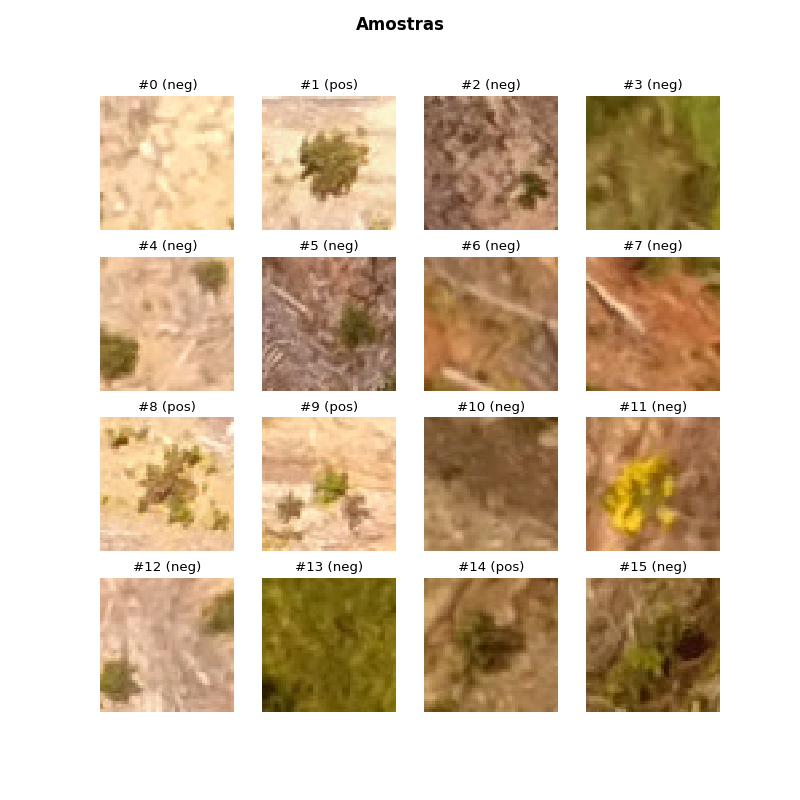

In [4]:
def on_slider_changed(change):
    selected_sld = change.owner.value
    ini_idx = selected_sld + (selected_sld*(samples_to_show-1))
    end_idx = ini_idx+samples_to_show-1
    display_images(ini_idx, end_idx, cmb_transformations.value)
    
def display_images(ini_idx, end_idx, transformation):
    for i, (img, label, ax) in enumerate(zip(all_samples[ini_idx:end_idx+1], all_labels[ini_idx:end_idx+1], axes.flat)):
        if transformation == 'RGB':
            ax.imshow(img/255)
        elif transformation == 'Escala de cinza':
            gray = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2GRAY)
            ax.imshow(gray, cmap='gray', vmin=0, vmax=255)
        elif transformation == 'Binarizadas (Otsu)':
            gray = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2GRAY)
            thresh, binarized = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            ax.imshow(binarized, cmap='gray')
        cls = 'neg' if label[0] == 1. else 'pos'
        ax.title.set_text(f'#{i+(sld_samples.value*samples_to_show)} ({cls})')
        ax.axis('off')

def on_cmb_changed(change):
    selected_sld = sld_samples.value
    ini_idx = selected_sld + (selected_sld*(samples_to_show-1))
    end_idx = ini_idx+samples_to_show-1
    display_images(ini_idx, end_idx, cmb_transformations.value)

# Definindo os widgets
label = widgets.Label(value='Selecione uma transformação e arraste o slider para visualizar as amostras:')

cmb_transformations = widgets.Dropdown(
    options=['RGB', 'Escala de cinza', 'Binarizadas (Otsu)'],
    value='RGB',
    description='',
)
cmb_transformations.observe(on_cmb_changed, names='value')

samples_to_show = 16
sld_samples = widgets.IntSlider(
    value=1,
    min=0,
    max=(total_samples/samples_to_show)-1,
    step=1,
    width=100,
    description='',
    orientation='horizontal',
)
sld_samples.observe(on_slider_changed, names='value')

# Mostransdo widgets
display(label)
display(cmb_transformations)
display(sld_samples)


fig, axes = plt.subplots(4, 4, figsize=(10,10))
fig.suptitle('Amostras', fontsize=15, fontweight='bold')
sld_samples.value = 0


----------------

## Conclusões

* Como não tenho informações sobre a base, desconheço totalmente o escopo do problema e não sei a motivação do problema, tentei explorar as imagens para tentar descobrir por conta própria do que se trata o problema porposto.
* Este é um problema de classificação binário, com images rotuladas em positivas e negativas
* As amostras positivas e negativas estão desbalanceadas. $\frac{2}{3}$ das imagens pertencem à classe negativa e $\frac{1}{3}$ das imagens são positivas.
* Parecem imagens aéreas de uma região semelhante à caatinga ou uma região desflorestada, podendo até ser uma região de garimpo. As imagens são recortes que mostram algumas plantas (que parecem arbustos ou árvores), solo rochoso ou seco e troncos caídos (lembrando uma área desmatada).
* Algumas imagens parecem estar recortadas (ex: #43, #253, etc).
* Sem conhecer detalhes do problema, é muito difícil encontrar um padrão visual para identificar as classes.